In [1]:
import sys
sys.path.append('/home/enes/bim/')# you should have this package on the sys.path

from utils import InferEta, Neutrality_Tests, Colless, intersect_with_weights
from Bimbalance import bSFS, bTree, PConst,Pnkb

In [2]:
import tskit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
import seaborn as sns

plt.style.use('default')

In [5]:
ts = tskit.load('example.trees')
ts

In [6]:
Ns = np.arange(25, 251, 25) # 250 is the total sample size, for the smaller ones we subsample

## Time complexity for btree 

In [7]:
np.random.seed(108)

dftree = []

for N in Ns:
    ct = ts.simplify(np.arange(N))
    trees = ct.trees()
    
    btree = bTree(N, rho2 = 0.001)
    
    for i, Tree in enumerate(trees):
        
        otime = time()
        n, k = btree.tree_to_splits(Tree)['splits']
        b = btree.predict(n, k, n-2).x[0]
        ctime = time()
        
        c = Colless(n, k)        
        cur = {'N':N, 'btree':b, 'Colless':c, 'time':ctime-otime}  
        dftree.append(cur)
        
dftree = pd.DataFrame(dftree)

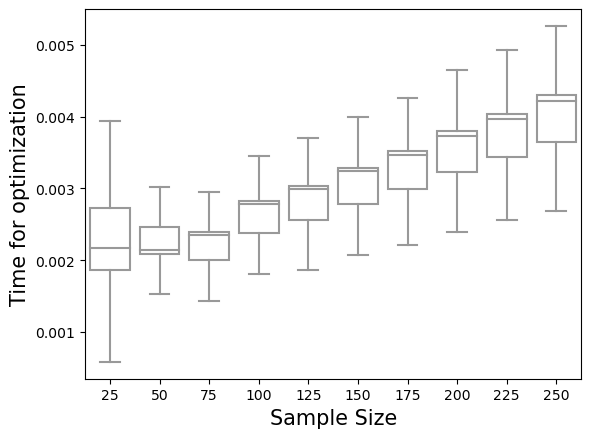

In [8]:
sns.boxplot(data=dftree, x='N', y='time', 
            showfliers=False, color = 'white')
plt.xlabel('Sample Size', size = 15)
plt.ylabel('Time for optimization', size = 15)
plt.savefig('plots/time_btree.jpg', dpi = 300)

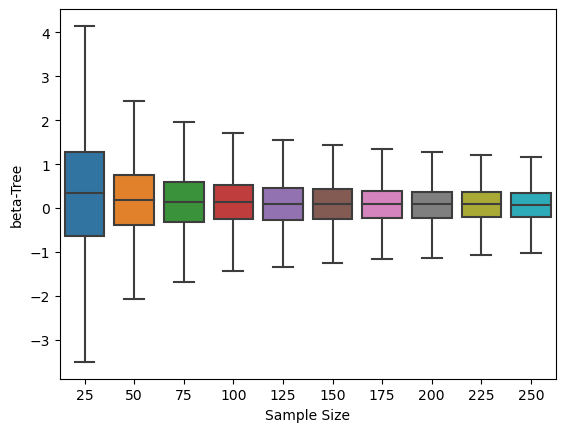

In [9]:
sns.boxplot(data=dftree, x='N', y='btree', showfliers=False)
plt.xlabel('Sample Size')
plt.ylabel('beta-Tree')
plt.show()

## Time complexity for bsfs

In [10]:
winsize = 100000
L = ts.get_sequence_length()
w = np.arange(0, L+1, winsize)

In [11]:
np.random.seed(108)

dfsfs = []

for N in Ns:
    ct = ts.simplify(np.arange(N))
    SFS = ct.allele_frequency_spectrum(span_normalise=False, 
                                       polarised=True,
                                       windows = w)[:,1:-1]
        
    bsfs = bSFS(N, rho2 = 0.001)
    nt = Neutrality_Tests(N)
    
    for i, sfs in enumerate(SFS):
        
        otime = time()
        b = bsfs.predict(sfs).x[0]
        ctime = time()
        
        cur = {'N':N, 'bsfs': b, 
               'TajD': nt.TajD(sfs), 'FulD': nt.FulD(sfs), 'FayH': nt.FayH(sfs),
               'ZngE': nt.ZngE(sfs), 'FerL': nt.FerL(sfs),
               'time':ctime-otime}
        
        dfsfs.append(cur)
        
dfsfs = pd.DataFrame(dfsfs)

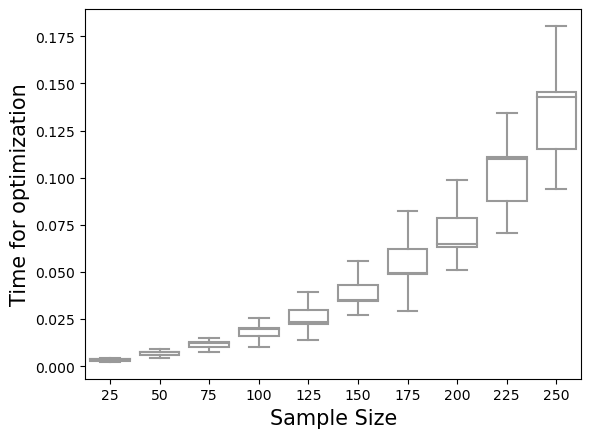

In [12]:
sns.boxplot(data=dfsfs, x='N', y='time', 
            showfliers=False, color = 'white')
plt.xlabel('Sample Size', size = 15)
plt.ylabel('Time for optimization', size = 15)
plt.savefig('plots/time_bsfs.jpg', dpi = 300)

Text(0, 0.5, 'beta-SFS')

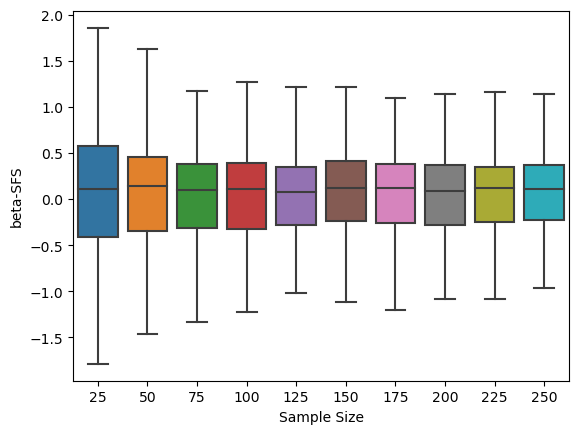

In [23]:
sns.boxplot(data=dfsfs, x='N', y='bsfs', showfliers=False)
plt.xlabel('Sample Size')
plt.ylabel('beta-SFS')